### Preventing the overfitting 

In [65]:
import numpy as np
import pandas as pd
import seaborn as ab
import matplotlib.pyplot as plt



In [66]:
df = pd.read_csv('E:/Full Stack Data Scientist Bootcamp/Supervised ML resources/fruit_dataset.csv')

In [67]:
df.head()

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79


In [68]:
df['fruit_label'].value_counts()

1    19
3    19
4    16
2     5
5     2
Name: fruit_label, dtype: int64

In [69]:
df['fruit_name'].value_counts()


apple       19
orange      19
lemon       16
mandarin     5
mango        2
Name: fruit_name, dtype: int64

In [70]:
x=df.iloc[:,2:5]
x

,mass,width,height
0,192,8.4,7.30
1,180,8.0,6.80
2,176,7.4,7.20
3,86,6.2,4.70
4,84,6.0,4.60
...,...,...,...
56,116,5.9,8.10
57,152,6.5,8.50
58,118,6.1,8.10
59,201,7.7,10.10


In [71]:
y=df.iloc[:,0:1]
y

,fruit_label
0,1
1,1
2,1
3,2
4,2
...,...
56,4
57,4
58,4
59,5


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [74]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [75]:
lr.fit(x_train,y_train)


E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
from sklearn import metrics

In [77]:
# finding the scroce to determin the overfitting of model

print('score of x_train ',lr.score(x_train,y_train))
print('score of x_test ',lr.score(x_test,y_test))

score of x_train  0.7291666666666666
score of x_test  0.46153846153846156


#### removing thr overfitting by use the trick of "train with more data"

In [78]:

# separate minority and majority classes
from sklearn.utils import resample

mandarin = df[df.fruit_label==2]
apple = df[df.fruit_label==1]

# upsample minority
mandarin_data_upsampled = resample(mandarin,
                          replace=True, # sample with replacement
                          n_samples= len(apple)-5,    #len(apple), # match number in majority class
                          random_state=67) # reproducible results

In [79]:
mandarin_data_upsampled

,fruit_label,fruit_name,mass,width,height,color_score
6,2,mandarin,80,5.9,4.3,0.81
5,2,mandarin,80,5.8,4.3,0.77
4,2,mandarin,84,6.0,4.6,0.79
4,2,mandarin,84,6.0,4.6,0.79
6,2,mandarin,80,5.9,4.3,0.81
6,2,mandarin,80,5.9,4.3,0.81
4,2,mandarin,84,6.0,4.6,0.79
6,2,mandarin,80,5.9,4.3,0.81
3,2,mandarin,86,6.2,4.7,0.80
6,2,mandarin,80,5.9,4.3,0.81


In [80]:
mandarin_data_upsampled = mandarin_data_upsampled.reset_index(drop=True)

In [81]:
mandarin_data_upsampled

,fruit_label,fruit_name,mass,width,height,color_score
0,2,mandarin,80,5.9,4.3,0.81
1,2,mandarin,80,5.8,4.3,0.77
2,2,mandarin,84,6.0,4.6,0.79
3,2,mandarin,84,6.0,4.6,0.79
4,2,mandarin,80,5.9,4.3,0.81
5,2,mandarin,80,5.9,4.3,0.81
6,2,mandarin,84,6.0,4.6,0.79
7,2,mandarin,80,5.9,4.3,0.81
8,2,mandarin,86,6.2,4.7,0.80
9,2,mandarin,80,5.9,4.3,0.81


In [82]:
Frame =[df,mandarin_data_upsampled]

df = pd.concat(Frame,axis = 0)

df

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79
...,...,...,...,...,...,...
9,2,mandarin,80,5.9,4.3,0.81
10,2,mandarin,76,5.8,4.0,0.81
11,2,mandarin,84,6.0,4.6,0.79
12,2,mandarin,80,5.8,4.3,0.77


In [83]:
df['fruit_label'].value_counts()

1    19
2    19
3    19
4    16
5     2
Name: fruit_label, dtype: int64

In [84]:

# separate minority and majority classes
from sklearn.utils import resample

mango = df[df.fruit_label==5]
apple = df[df.fruit_label==1]

# upsample minority
mango_data_upsampled = resample(mango,
                          replace=True, # sample with replacement
                          n_samples= len(apple)-2,    #len(apple), # match number in majority class
                          random_state=67) # reproducible results

In [85]:
mango_data_upsampled

,fruit_label,fruit_name,mass,width,height,color_score
60,5,mango,209,8.1,12.11,0.78
60,5,mango,209,8.1,12.11,0.78
59,5,mango,201,7.7,10.10,0.71
60,5,mango,209,8.1,12.11,0.78
60,5,mango,209,8.1,12.11,0.78
60,5,mango,209,8.1,12.11,0.78
60,5,mango,209,8.1,12.11,0.78
60,5,mango,209,8.1,12.11,0.78
60,5,mango,209,8.1,12.11,0.78
59,5,mango,201,7.7,10.10,0.71


In [86]:
mango_data_upsampled = mango_data_upsampled.reset_index(drop=True)

In [87]:
mango_data_upsampled

,fruit_label,fruit_name,mass,width,height,color_score
0,5,mango,209,8.1,12.11,0.78
1,5,mango,209,8.1,12.11,0.78
2,5,mango,201,7.7,10.10,0.71
3,5,mango,209,8.1,12.11,0.78
4,5,mango,209,8.1,12.11,0.78
5,5,mango,209,8.1,12.11,0.78
6,5,mango,209,8.1,12.11,0.78
7,5,mango,209,8.1,12.11,0.78
8,5,mango,209,8.1,12.11,0.78
9,5,mango,201,7.7,10.10,0.71


In [88]:
Frame =[df,mango_data_upsampled]

df = pd.concat(Frame,axis = 0)

df

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.30,0.55
1,1,apple,180,8.0,6.80,0.59
2,1,apple,176,7.4,7.20,0.60
3,2,mandarin,86,6.2,4.70,0.80
4,2,mandarin,84,6.0,4.60,0.79
...,...,...,...,...,...,...
12,5,mango,209,8.1,12.11,0.78
13,5,mango,209,8.1,12.11,0.78
14,5,mango,201,7.7,10.10,0.71
15,5,mango,209,8.1,12.11,0.78


In [89]:
df['fruit_name'].value_counts()

apple       19
mandarin    19
orange      19
mango       19
lemon       16
Name: fruit_name, dtype: int64

In [90]:
df

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.30,0.55
1,1,apple,180,8.0,6.80,0.59
2,1,apple,176,7.4,7.20,0.60
3,2,mandarin,86,6.2,4.70,0.80
4,2,mandarin,84,6.0,4.60,0.79
...,...,...,...,...,...,...
12,5,mango,209,8.1,12.11,0.78
13,5,mango,209,8.1,12.11,0.78
14,5,mango,201,7.7,10.10,0.71
15,5,mango,209,8.1,12.11,0.78


In [92]:
x=df.iloc[:,2:5]
x

,mass,width,height
0,192,8.4,7.30
1,180,8.0,6.80
2,176,7.4,7.20
3,86,6.2,4.70
4,84,6.0,4.60
...,...,...,...
12,209,8.1,12.11
13,209,8.1,12.11
14,201,7.7,10.10
15,209,8.1,12.11


In [94]:
y=df.iloc[:,0:1]
y

,fruit_label
0,1
1,1
2,1
3,2
4,2
...,...
12,5
13,5
14,5
15,5


In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(x_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
from sklearn import metrics

print('score of x_train ',lr.score(x_train,y_train))
print('score of x_test ',lr.score(x_test,y_test))

score of x_train  0.7671232876712328
score of x_test  0.7894736842105263


#### removing the overfitting by use the trick of "Removing the Features"
#### removing the overfitting by use the trick of " Add Regularlization "

In [97]:
#  for above point check the drive below
    https://drive.google.com/drive/folders/16tBvZaPnUfgTaW3KSe18FrEM3UGN1nR4

IndentationError: unexpected indent (3699072142.py, line 2)

### Preventing the underfitting 

training score:  0.29065760334760526
test score:  0.14324706577023627


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


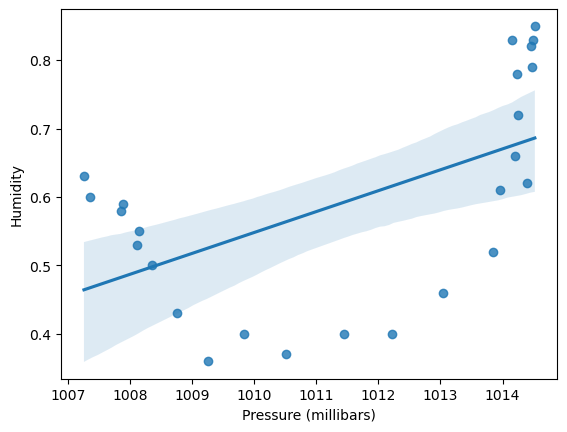

In [98]:
weather_data_p = pd.read_csv('E:/Full Stack Data Scientist Bootcamp/Supervised ML resources/WeatherDataP.csv')
weather_data_p


x = weather_data_p[['Pressure (millibars)']]
y = weather_data_p.Humidity


from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test =train_test_split(x,y, test_size=.20, random_state=1)


from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)


from sklearn import metrics
print('training score: ',lr.score(x_train,y_train))
print('test score: ',lr.score(x_test,y_test))


import seaborn as sb
sb.regplot(x,y)
plt.show()

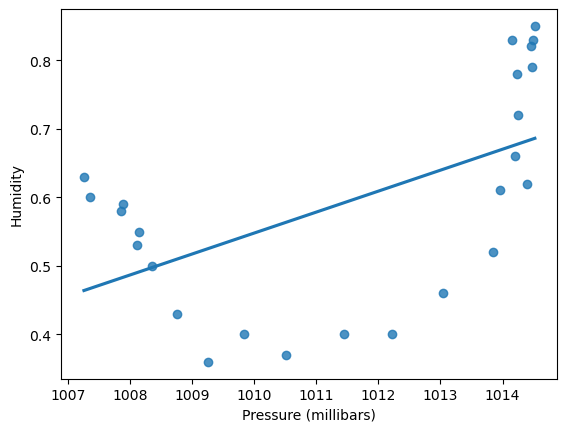

In [101]:
import seaborn as sb
sb.regplot(x,y,ci=None)
plt.show()

### 1- By increasing the complexity of the model

In [102]:
from sklearn.preprocessing import PolynomialFeatures

pre_process = PolynomialFeatures(degree = 2)

x_poly = pre_process.fit_transform(x)

x_poly

array([[1.00000000e+00, 1.01440000e+03, 1.02900736e+06],
       [1.00000000e+00, 1.01420000e+03, 1.02860164e+06],
       [1.00000000e+00, 1.01447000e+03, 1.02914938e+06],
       [1.00000000e+00, 1.01445000e+03, 1.02910880e+06],
       [1.00000000e+00, 1.01449000e+03, 1.02918996e+06],
       [1.00000000e+00, 1.01452000e+03, 1.02925083e+06],
       [1.00000000e+00, 1.01416000e+03, 1.02852051e+06],
       [1.00000000e+00, 1.01424000e+03, 1.02868278e+06],
       [1.00000000e+00, 1.01425000e+03, 1.02870306e+06],
       [1.00000000e+00, 1.01396000e+03, 1.02811488e+06],
       [1.00000000e+00, 1.01385000e+03, 1.02789182e+06],
       [1.00000000e+00, 1.01304000e+03, 1.02625004e+06],
       [1.00000000e+00, 1.01222000e+03, 1.02458933e+06],
       [1.00000000e+00, 1.01144000e+03, 1.02301087e+06],
       [1.00000000e+00, 1.01052000e+03, 1.02115067e+06],
       [1.00000000e+00, 1.00983000e+03, 1.01975663e+06],
       [1.00000000e+00, 1.00926000e+03, 1.01860575e+06],
       [1.00000000e+00, 1.00876

In [103]:
df_x_poly = pd.DataFrame(x_poly)
df_x_poly.columns = ['1','x','x_squared']
df_x_poly

,1,x,x_squared
0,1.0,1014.40,1.029007e+06
1,1.0,1014.20,1.028602e+06
2,1.0,1014.47,1.029149e+06
3,1.0,1014.45,1.029109e+06
4,1.0,1014.49,1.029190e+06
5,1.0,1014.52,1.029251e+06
6,1.0,1014.16,1.028521e+06
7,1.0,1014.24,1.028683e+06
8,1.0,1014.25,1.028703e+06
9,1.0,1013.96,1.028115e+06


In [104]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train,y_test =train_test_split(x_poly,y, test_size=.20, random_state=1)

In [107]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [109]:
y_pred = lr.predict(x_poly)
y_pred

array([0.7512093 , 0.70762429, 0.76702574, 0.76247704, 0.77159822,
       0.77850151, 0.69919259, 0.71615109, 0.71829765, 0.65846058,
       0.63707139, 0.50171561, 0.40441092, 0.34894187, 0.32999705,
       0.34880305, 0.3856825 , 0.43393244, 0.48323117, 0.51887218,
       0.51291998, 0.55987955, 0.5533092 , 0.64808432, 0.6678387 ])

In [110]:
from sklearn import metrics

print('training score: ',lr.score(x_train,y_train))
print('test score: ',lr.score(x_test,y_test))

training score:  0.8212622197139496
test score:  0.9427391324677238


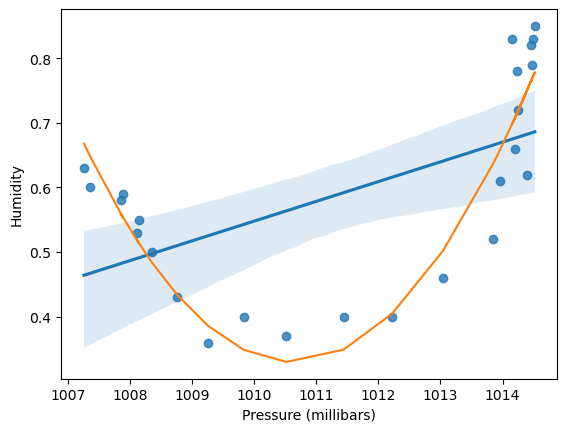

In [122]:
import seaborn as sns

sns.regplot(x,y,fit_reg=True)
plt.plot(x,y_pred)
plt.show()